<font size = "22"> <b> OBJECTIVES </b> </font>

<font size = "5"> Our goal is build a portfolio containing multiple stocks with optimal weights. In this project, we assume that we want to invest $100,000 in the stocks in our portfolio. We want to be able to prescribe the number of stocks the investor should buy. 

<font size = "22"> <b> APPROACH </b> </font>

<font size = "5">
 <li> First we import our one year of data for our stocks using pandas-datareader </li>
 <li> Generate 10,000 scenarios with random weighting to find our optimal portfolio using sharpe ratio and visualise it.</li>
 <li> We then build portfolio with our optimal weights and check its performance using performance metrics.</li>
 <li> We prescribe the number of stocks to purchase for each of stock in our portfolio



<font size = "22"> <b> LIBRARIES  </b> </font>

In [2]:
#import the libraries
import pandas as pd
import numpy as np
import pandas_datareader.data as pdr
from pandas_datareader._utils import RemoteDataError
import matplotlib.pyplot as plt
import sys
import os
from datetime import date
from dateutil.relativedelta import relativedelta

In [1]:
#Next we upgrade pandas and pandas-datareader
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<font size = "22"> <b> BRIEF DESCRIPTION OF THE DATA  </b> </font>

<font size = "5"> We get our data from Yahoo using the pandas-datareader library. We make use of the adjusted closing prices of each stock present in our portfolio in this project. Below is a brief description of our data

In [3]:
DESCR = pd.DataFrame({'tickers': ['MRNA', 'PFE', 'JNJ', 'CVS', 'UNH', 'MCK', 'ABC', 'CI', 'CAH', 'CNC' ,' WBA', 'ANTM.JK'],
                      'Name' : ['Moderna, Inc.', 'Pfizer Inc.', 'Johnson & Johnson', 'CVS Health Corporation', 'UnitedHealth Group Incorporated',
                      'McKesson Corporation', 'AmerisourceBergen Corporation', 'Cigna Corporation', 'Cardinal Health, Inc.', 'Centene Corporation',
                      'Walgreens Boots Alliance, Inc.', 'PT Aneka Tambang Tbk']})
DESCR

,tickers,Name
0,MRNA,"Moderna, Inc."
1,PFE,Pfizer Inc.
2,JNJ,Johnson & Johnson
3,CVS,CVS Health Corporation
4,UNH,UnitedHealth Group Incorporated
5,MCK,McKesson Corporation
6,ABC,AmerisourceBergen Corporation
7,CI,Cigna Corporation
8,CAH,"Cardinal Health, Inc."
9,CNC,Centene Corporation


In [4]:
#set start and end date parameters
start_date = date.today() - relativedelta(years=1)
end_date = date.today()

# Create an empty dictionary to store our stock info
stocks = {}
# List the stock ticker symbols for our portfolio
crypto_list = ['MRNA', 'PFE', 'JNJ', 'CVS', 'UNH', 'MCK', 'ABC', 'CI', 'CAH', 'CNC', 'JNJ' ,' WBA', 'ANTM']

# Loop through each stock in the stock_list and return the Adj Close
for i in crypto_list:
  try:
    stocks[i] = pdr.DataReader(i, 'yahoo', start_date, end_date)[['Adj Close']]
  except RemoteDataError:
    print('No information for {}'.format(i))
    continue
stocks

No information for  WBA
No information for ANTM


{'MRNA':              Adj Close
 Date                  
 2021-10-28  347.920013
 2021-10-29  345.209991
 2021-11-01  337.170013
 2021-11-02  348.640015
 2021-11-03  345.920013
 ...                ...
 2022-10-24  133.020004
 2022-10-25  136.570007
 2022-10-26  142.000000
 2022-10-27  144.110001
 2022-10-28  145.595001
 
 [253 rows x 1 columns], 'PFE':             Adj Close
 Date                 
 2021-10-28  41.813198
 2021-10-29  42.355480
 2021-11-01  42.258640
 2021-11-02  44.011349
 2021-11-03  43.401287
 ...               ...
 2022-10-24  45.540001
 2022-10-25  45.590000
 2022-10-26  46.060001
 2022-10-27  45.740002
 2022-10-28  46.270000
 
 [253 rows x 1 columns], 'JNJ':              Adj Close
 Date                  
 2021-10-28  158.665833
 2021-10-29  158.695068
 2021-11-01  158.831451
 2021-11-02  161.335403
 2021-11-03  160.819016
 ...                ...
 2022-10-24  170.979996
 2022-10-25  170.710007
 2022-10-26  172.210007
 2022-10-27  172.309998
 2022-10-28  173.479996
 
 

<font size = "22"> <b> PREPARE SCENARIOS TO OPTIMIZE PORTFOLIO WEIGHTING  </b> </font>

In [5]:
#Creates an empty dictionary to store the adjusted close prices of our data
stock_adj_close = {}
for stock_name, stock_data in stocks.items():
  stock_adj_close[stock_name] = stock_data['Adj Close']

stock_adj_close = pd.DataFrame(stock_adj_close)
stock_adj_close

,MRNA,PFE,JNJ,CVS,UNH,MCK,ABC,CI,CAH,CNC
Date,,,,,,,,,,
2021-10-28,347.920013,41.813198,158.665833,86.664162,449.600830,203.650101,119.132866,211.905121,46.095413,71.610001
2021-10-29,345.209991,42.355480,158.695068,87.309578,454.566376,206.490997,120.435715,209.803253,46.182346,71.239998
2021-11-01,337.170013,42.258640,158.831451,88.649345,448.287933,206.689682,121.215469,212.278351,46.964767,71.739998
2021-11-02,348.640015,44.011349,161.335403,89.138306,446.244446,217.467163,123.574432,210.883667,47.225574,69.339996
2021-11-03,345.920013,43.401287,160.819016,94.213768,451.466614,222.731750,126.624306,214.360565,48.684170,73.900002
...,...,...,...,...,...,...,...,...,...,...
2022-10-24,133.020004,45.540001,170.979996,94.800003,541.599976,379.109985,150.100006,306.950012,73.800003,75.809998
2022-10-25,136.570007,45.590000,170.710007,92.220001,540.219971,382.429993,152.770004,310.920013,73.720001,83.629997
2022-10-26,142.000000,46.060001,172.210007,92.730003,543.169983,385.410004,154.690002,314.950012,74.910004,84.800003


In [6]:
#We check for missing values in our dataset
stock_adj_close.isnull().sum()

MRNA    0
PFE     0
JNJ     0
CVS     0
UNH     0
MCK     0
ABC     0
CI      0
CAH     0
CNC     0
dtype: int64

In [7]:
# Create stock_returns DataFrames to see the day over day change in stock value
stock_adj_pct = stock_adj_close.pct_change()
stock_adj_pct

,MRNA,PFE,JNJ,CVS,UNH,MCK,ABC,CI,CAH,CNC
Date,,,,,,,,,,
2021-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-29,-0.007789,0.012969,0.000184,0.007447,0.011044,0.013950,0.010936,-0.009919,0.001886,-0.005167
2021-11-01,-0.023290,-0.002286,0.000859,0.015345,-0.013812,0.000962,0.006474,0.011797,0.016942,0.007019
2021-11-02,0.034018,0.041476,0.015765,0.005516,-0.004558,0.052143,0.019461,-0.006570,0.005553,-0.033454
2021-11-03,-0.007802,-0.013861,-0.003201,0.056939,0.011702,0.024209,0.024680,0.016487,0.030886,0.065763
...,...,...,...,...,...,...,...,...,...,...
2022-10-24,0.036627,0.013126,0.013455,0.022433,0.014745,0.022852,0.016043,0.018617,0.010544,0.026540
2022-10-25,0.026688,0.001098,-0.001579,-0.027215,-0.002548,0.008757,0.017788,0.012934,-0.001084,0.103153
2022-10-26,0.039760,0.010309,0.008787,0.005530,0.005461,0.007792,0.012568,0.012962,0.016142,0.013990


<font size = "22"> <b> BUILD AND RUN 10000 PORTFOLIO SCENARIOS  </b> </font>

In [8]:
# Define the number of scenarios and create a blank array to populate stock weightings for each scenario
scenarios = 1000
weights_array = np.zeros((scenarios, len(stock_adj_close.columns)))
returns_array = np.zeros(scenarios)
volatility_array = np.zeros(scenarios)
sharpe_array = np.zeros(scenarios)

In [9]:
import random
from datetime import datetime
random.seed(42)
np.random.seed(42)
for index in range(scenarios): 
    numbers = np.array(np.random.random(len(stock_adj_pct.columns)))
    weights = numbers / np.sum(numbers)
    weights_array[index,:] = weights
    returns_array[index] = np.sum(stock_adj_pct.mean()*252*weights)
    volatility_array[index] = np.sqrt(np.dot(weights.T,np.dot(stock_adj_pct.cov()*252, weights)))
    sharpe_array[index] = returns_array[index] / volatility_array[index]

In [10]:
# Find the highest sharpe ratio in sharpe_array
sharpe_array.max()

1.964362967782887

In [11]:
# Find the index of the optimal portfolio
index_max_sharpe = sharpe_array.argmax()
index_max_sharpe

64

In [12]:
# Print the optimal weights for each stock
print(stocks.keys())
optimal_weights = weights_array[sharpe_array.argmax()]
optimal_weights_df = pd.DataFrame({'stocks': stocks.keys(), 'weights': weights_array[sharpe_array.argmax(), :]})
optimal_weights_df

dict_keys(['MRNA', 'PFE', 'JNJ', 'CVS', 'UNH', 'MCK', 'ABC', 'CI', 'CAH', 'CNC'])


,stocks,weights
0,MRNA,0.004509
1,PFE,0.072350
2,JNJ,0.047498
3,CVS,0.073567
4,UNH,0.026903
5,MCK,0.200042
6,ABC,0.133341
7,CI,0.152549
8,CAH,0.177274
9,CNC,0.111967


<font size = "22"> <b> VISUALISE THE OPTIMAL PORTFOLIO AND THE PORTFOLIO SCENARIOS  </b> </font>

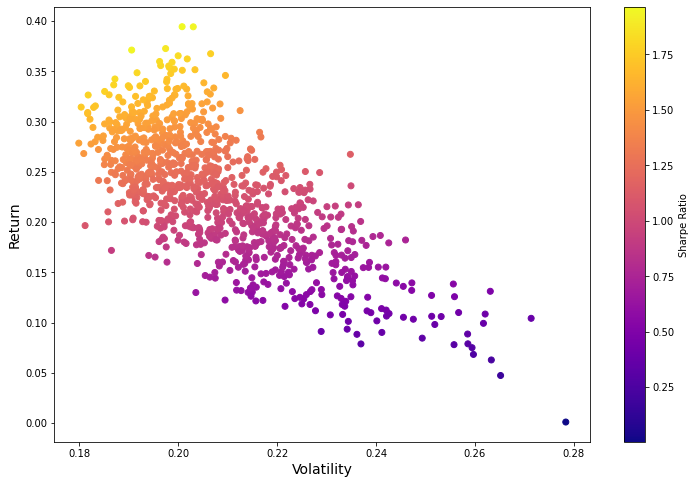

In [13]:
# Visualize volatility vs returns for each scenario
plt.figure(figsize=(12,8))

plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='plasma')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility', size = 14)
plt.ylabel('Return', size = 14);

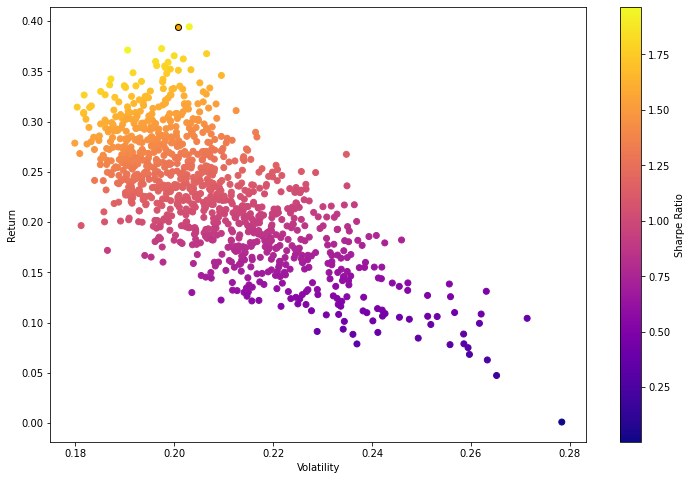

In [14]:
# Identify the optimal portfolio in the returns and volatility arrays
max_sharpe_return = returns_array[index_max_sharpe]
max_sharpe_volatility = volatility_array[index_max_sharpe]

# Visualize volatility vs returns for each scenario
plt.figure(figsize=(12,8))

plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='plasma')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add the optimal portfolio to the visual
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='orange', edgecolors='black');

In [15]:
#Normalize our data
for stock_name, stock_data in stocks.items():
  first_adj_close = stock_data['Adj Close'].iloc[0]
  stock_data['Normalized Data'] = stock_data['Adj Close'] / first_adj_close
stocks['MRNA']

,Adj Close,Normalized Data
Date,,
2021-10-28,347.920013,1.000000
2021-10-29,345.209991,0.992211
2021-11-01,337.170013,0.969102
2021-11-02,348.640015,1.002069
2021-11-03,345.920013,0.994252
...,...,...
2022-10-24,133.020004,0.382329
2022-10-25,136.570007,0.392533
2022-10-26,142.000000,0.408140


In [16]:
#We create a dictionary to store the weights of our stock
weights_allocation = {}
for i, j in enumerate(stocks.keys()):
  weights_allocation[j] = optimal_weights[i]

weights_allocation

{'MRNA': 0.004508665853811413,
 'PFE': 0.07234980952160419,
 'JNJ': 0.04749833166706962,
 'CVS': 0.07356691640081475,
 'UNH': 0.02690260144376326,
 'MCK': 0.2000423685234752,
 'ABC': 0.13334082280775794,
 'CI': 0.15254921362833293,
 'CAH': 0.1772743936720862,
 'CNC': 0.11196687648128431}

In [17]:
for stock_name, stock_data in stocks.items():
  stock_data['weights'] = stock_data['Normalized Data'] * weights_allocation[stock_name]

In [18]:
#Set the value of our portfolio to $100k
for stock_name, stock_data in stocks.items():
  stock_data['Position Value'] = stock_data['weights'] * 100000

In [19]:
stocks['JNJ']

,Adj Close,Normalized Data,weights,Position Value
Date,,,,
2021-10-28,158.665833,1.000000,0.047498,4749.833167
2021-10-29,158.695068,1.000184,0.047507,4750.708373
2021-11-01,158.831451,1.001044,0.047548,4754.791147
2021-11-02,161.335403,1.016825,0.048297,4829.749657
2021-11-03,160.819016,1.013571,0.048143,4814.291026
...,...,...,...,...
2022-10-24,170.979996,1.077611,0.051185,5118.470950
2022-10-25,170.710007,1.075909,0.051104,5110.388537
2022-10-26,172.210007,1.085363,0.051553,5155.292658


In [20]:
# Create position_values dictionary
position_values = {}
for stock_name, stock_data in stocks.items():
  position_values[stock_name] = stock_data['Position Value']
position_values = pd.DataFrame(position_values)
position_values.head()

,MRNA,PFE,JNJ,CVS,UNH,MCK,ABC,CI,CAH,CNC
Date,,,,,,,,,,
2021-10-28,450.866585,7234.980952,4749.833167,7356.691640,2690.260144,20004.236852,13334.082281,15254.921363,17727.439367,11196.687648
2021-10-29,447.354691,7328.812586,4750.708373,7411.479321,2719.972299,20283.293766,13479.905125,15103.609181,17760.872236,11138.835321
2021-11-01,436.935752,7312.056277,4754.791147,7525.208639,2682.404212,20302.810259,13567.180055,15281.789963,18061.776857,11217.013561
2021-11-02,451.799629,7615.329232,4829.749657,7566.715184,2670.176670,21361.465685,13831.209688,15181.387518,18162.078397,10841.757770
2021-11-03,448.274802,7509.769634,4814.291026,7997.557768,2701.424366,21878.598026,14172.570251,15431.687314,18723.027036,11554.744131


In [21]:
# Add 'Total' column to position values, summing the other columns
position_values['Total'] = position_values.sum(axis=1)

<font size = "22"> <b> VISUALISE PORTFOLIO'S PERFORMANCE AND INDIVIDUAL STOCK PERFORMANCE  </b> </font>

Text(0, 0.5, 'Total Value')

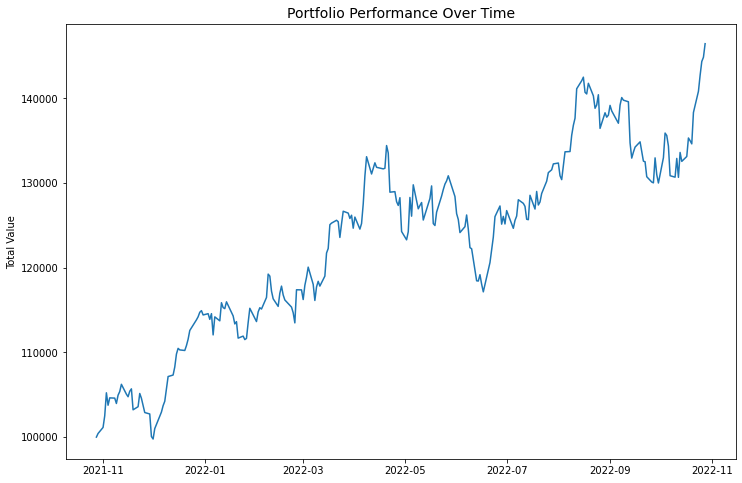

In [22]:
#View the total portfolio
plt.figure(figsize = (12,8))
plt.plot(position_values['Total'])
plt.title('Portfolio Performance Over Time', size = 14)
plt.ylabel('Total Value')

Text(0, 0.5, 'Total Value')

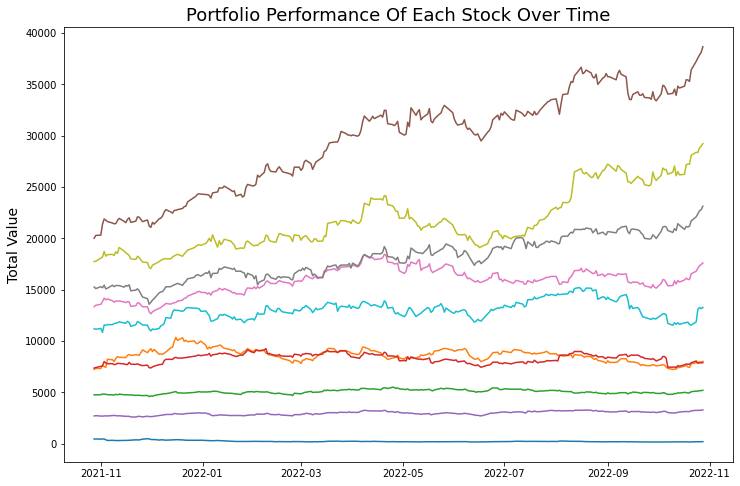

In [23]:
plt.figure(figsize = (12,8))
plt.plot(position_values.iloc[:, 0:10])
plt.title('Portfolio Performance Of Each Stock Over Time', size = 18)
plt.ylabel('Total Value', size = 14)

<font size = "22"> <b> PERFORMANCE METRICS  </b> </font>

In [24]:
start_value = position_values['Total'][0]
end_value = position_values['Total'][-1]

# Calculate the cumulative portfolio return as a percentage
cumulative_return = end_value / start_value - 1

print('{} %'.format(round(cumulative_return*100, 2)))

46.45 %


In [25]:
position_values['Daily Returns'] = position_values['Total'].pct_change()

In [26]:
mean_daily_return = position_values['Daily Returns'].mean()
print('The mean daily return is {}'.format(round(mean_daily_return, 4)))

The mean daily return is 0.0016


In [27]:
# Calculate the standard deviation of Daily Return 
std_daily_return = position_values['Daily Returns'].std()
print('The standard deviation of the daily return is {}'.format(round(std_daily_return, 4)))

The standard deviation of the daily return is 0.0127


In [28]:
#Calculate Sharpe's ratio 
sharpe_ratio = mean_daily_return / std_daily_return
sharpe_ratio

0.12576144206074064

In [29]:
last_prices = stock_adj_close.iloc[-1, :].values
weight_prices = []
for name, data in weights_allocation.items():
  weight_prices.append(data * 100000)
weight_prices

[450.8665853811413,
 7234.980952160419,
 4749.833166706962,
 7356.691640081475,
 2690.260144376326,
 20004.23685234752,
 13334.082280775794,
 15254.921362833293,
 17727.43936720862,
 11196.68764812843]

In [30]:
no_of_stocks = weight_prices / last_prices
no_of_stocks = np.round_(no_of_stocks, decimals = 0)
no_of_stocks

array([  3., 156.,  27.,  79.,   5.,  51.,  85.,  47., 233., 132.])

In [31]:
#We convert our weight to actual allocation values
assign_no_of_stocks = pd.DataFrame({'Stock Name': stocks.keys(), 'No of Stocks': no_of_stocks})
assign_no_of_stocks

,Stock Name,No of Stocks
0,MRNA,3.0
1,PFE,156.0
2,JNJ,27.0
3,CVS,79.0
4,UNH,5.0
5,MCK,51.0
6,ABC,85.0
7,CI,47.0
8,CAH,233.0
9,CNC,132.0
